# Milestone 1
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

Heroku App : https://kamil-riyadi-ftds-009-p0m1.herokuapp.com/

## I. Introduction

### I.1 Project Background
This project is meant for fulfilling the `Milestone 1` assignment of `Hacktiv8 Data Science bootcamp Program.`\
Story on this project is a made up story aim to hone my skill in `data story telling.`

I am playing role as freelancing `Data Analyst` hired by Supermarket Company based in `Myanmar.`

The company had just finished collecting data of their `1st Quarter` sales of 2019. The director of the Company,\
request my assistance in interpreting the quarter sales data. He hoped meaningful insight and an actionable output.\
He requested that I sould present my findings in the next weekly meeting with all departemen.

### I.2 Dataset Source and Information
Dataset for this project is made available by `Aung Pyae`, a Mandalayan Kaggle Expert. You can check the dataset [here.](https://www.kaggle.com/aungpyaeap/supermarket-sales)

**Content**

The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Column Description**

| Column                  | Description                                                                                                                                                     |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Invoice ID              |  Computer generated sales slip invoice identification number                                                                                                    |
| Branch                  |  Branch of supercenter (3 branches are available identified by A, B and C).                                                                                     |
| City                    |  Location of supercenters                                                                                                                                       |
| Customer type           |  Type of customers, recorded by Members for customers using member card and Normal for without member card.                                                     |
| Gender                  |  Gender type of customer                                                                                                                                        |
| Product line            |  General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel |
| Unit price              |  Price of each product in $                                                                                                                                     |
| Quantity                |  Number of products purchased by customer                                                                                                                       |
| Tax 5%                  |  5% tax fee for customer buying                                                                                                                                 |
| Total                   |  Total price including tax                                                                                                                                      |
| Date                    |  Date of purchase (Record available from January 2019 to March 2019)                                                                                            |
| Time                    |  Purchase time (10am to 9pm)                                                                                                                                    |
| Payment                 |  Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)                                                                |
| cogs                    |  Cost of goods sold                                                                                                                                             |
| gross margin percentage |  Gross margin percentage                                                                                                                                        |
| gross income            |  Gross income                                                                                                                                                   |
| Rating                  |  Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)                                                                    |

**License**

`Aung Pyae` did not clearly state the usage license for this data, but He said this dataset can be used for predictive data analytics purpose.

### I.3 Objectives

Based on `Project Background`, my Objectives will be:
- Explore and analyze the dataset and comes up with meaningful insight.
- Since I requested to make a presentation, I will make dashboard to help me explain during the presentation.
- Comes with actionable output for the Company.

## II. Importing Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## III. Data Loading

Let's import the dataset and put it in variable.\
For this process, I will utilize `pandas.`

In [2]:
# Import Dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

After successful import, let's see how the dataset looks like.

In [3]:
# Check Imported Data
# Shows 10 first rows
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Also, let's see the basic information of the dataset.

In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Based on dataframe information, We know this dataset is consist of `1000 rows and 17 columns.`\
From `Non-Null Count`, We know that there is no null entries in all columns.\
From `Dtype`, I can say most datatype is already matched the column description above,\
except for `Date` and `Time` columns, I will change its datatype into  datetime in cleaning process.


In [5]:
# Null count summary for each column
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


From `null count` summary, I can confirm there is no null entries in the dataframe.
But, Although our dataset is clean from null entries, it is not necessarily clean from `Non-standard missing value` or `Unexpected missing value.`\

I will identify any `Non-standard missing value` or `Unexpected missing value` in the next process of data cleaning.

## IV. Data Cleaning

`Non-standard missing value` can be identified as any values in the columns entries that listed as `['na', 'N/A', '-', '', etc.]` or any values that indicated as null entry but failed to be detected as `standard missing value` by `pandas.`

While, `Unexpected missing value` can be identified as any values in the columns entries that did not match its columns description.\
`For example`, We know from `Branch` column description, there are only three branches, [A, B, C]. Any value beside those three will be identified as `Unexpected missing value.`

In order to identify `Non-standard missing value` and `Unexpected missing value`, I need to check every unique value in each column.\
Let's get to the process.

In [6]:
# Unique Value Identification
# Column : Invoice ID
# Desc :  Computer generated sales slip invoice identification number

df['Invoice ID'].unique()

array(['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176',
       '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665',
       '665-32-9167', '692-92-5582', '351-62-0822', '529-56-3974',
       '365-64-0515', '252-56-2699', '829-34-3910', '299-46-1805',
       '656-95-9349', '765-26-6951', '329-62-1586', '319-50-3348',
       '300-71-4605', '371-85-5789', '273-16-6619', '636-48-8204',
       '549-59-1358', '227-03-5010', '649-29-6775', '189-17-4241',
       '145-94-9061', '848-62-7243', '871-79-8483', '149-71-6266',
       '640-49-2076', '595-11-5460', '183-56-6882', '232-16-2483',
       '129-29-8530', '272-65-1806', '333-73-7901', '777-82-7220',
       '280-35-5823', '554-53-8700', '354-25-5821', '228-96-1411',
       '617-15-4209', '132-32-9879', '370-41-7321', '727-46-3608',
       '669-54-1719', '574-22-5561', '326-78-5178', '162-48-8011',
       '616-24-2851', '778-71-5554', '242-55-6721', '399-46-5918',
       '106-35-6779', '635-40-6220', '817-48-8732', '120-06-42

`Invoice ID` seems follow the same pattern, therefore I asume it is already good entry.

In [7]:
# Unique Value Identification
# Column : Branch
# Desc : Branch of supercenter (3 branches are available identified by A, B and C).

df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

`Product line` column shows no strange value. Each unique ID match the column description.

In [8]:
# Unique Value Identification
# Column : City
# Desc : Location of supercenters

df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

`City` column shows no strange value. Each unique ID are valid city name.

In [9]:
# Unique Value Identification
# Column : Customer type
# Desc : Type of customers, recorded by Members for customers using member card and Normal for without member card.

df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

`Customer type` column shows no strange value. Each unique ID match the column description.

In [10]:
# Unique Value Identification
# Column : Gender
# Desc : Gender type of customer

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

`Gender` column shows no strange value. Each unique ID match the column description.

In [11]:
# Unique Value Identification
# Column : Product line
# Desc :  General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

`Product line` column shows no strange value. Each unique ID match the column description.

In [12]:
# Unique Value Identification
# Column : Unit price
# Desc : Price of each product in $

df['Unit price'].describe().T.round(2)

count    1000.00
mean       55.67
std        26.49
min        10.08
25%        32.88
50%        55.23
75%        77.94
max        99.96
Name: Unit price, dtype: float64

`Unit price` column shows no strange value. No negative value, it is aready match the column description.

In [13]:
# Unique Value Identification
# Column : Quantity
# Desc : Number of products purchased by customer

df['Quantity'].describe().T.round(2)

count    1000.00
mean        5.51
std         2.92
min         1.00
25%         3.00
50%         5.00
75%         8.00
max        10.00
Name: Quantity, dtype: float64

`Quantity` column shows no strange value. No negative value, it is aready match the column description.

In [14]:
# Unique Value Identification
# Column : Tax 5%
# Desc : 5% tax fee for customer buying

df['Tax 5%'].describe().T.round(2)

count    1000.00
mean       15.38
std        11.71
min         0.51
25%         5.92
50%        12.09
75%        22.45
max        49.65
Name: Tax 5%, dtype: float64

`Tax 5%` column shows no strange value. It is aready match the column description.

In [15]:
# Unique Value Identification
# Column : Total
# Desc : Total price including tax

df['Total'].describe().T.round(2)

count    1000.00
mean      322.97
std       245.89
min        10.68
25%       124.42
50%       253.85
75%       471.35
max      1042.65
Name: Total, dtype: float64

`Total` column shows no strange value. It is already match the column description.

In [16]:
# Unique Value Identification
# Column : Date
# Desc : Date of purchase (Record available from January 2019 to March 2019)

# Convert into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check min and max value
print(f'Earliest Date : ', min(df['Date']))
print(f'Latest Date : ', max(df['Date']))

Earliest Date :  2019-01-01 00:00:00
Latest Date :  2019-03-30 00:00:00


In [17]:
# Date unique value
pd.set_option('display.max.rows', None)
df['Date'].sort_values()

856   2019-01-01
567   2019-01-01
245   2019-01-01
696   2019-01-01
523   2019-01-01
829   2019-01-01
496   2019-01-01
970   2019-01-01
484   2019-01-01
17    2019-01-01
839   2019-01-01
450   2019-01-01
451   2019-01-02
425   2019-01-02
410   2019-01-02
300   2019-01-02
88    2019-01-02
558   2019-01-02
837   2019-01-02
744   2019-01-02
205   2019-01-03
374   2019-01-03
170   2019-01-03
934   2019-01-03
541   2019-01-03
777   2019-01-03
271   2019-01-03
987   2019-01-03
269   2019-01-04
407   2019-01-04
213   2019-01-04
412   2019-01-04
156   2019-01-04
206   2019-01-04
766   2019-01-05
106   2019-01-05
0     2019-01-05
544   2019-01-05
536   2019-01-05
945   2019-01-05
268   2019-01-05
511   2019-01-05
501   2019-01-05
376   2019-01-05
243   2019-01-05
936   2019-01-05
254   2019-01-06
697   2019-01-06
703   2019-01-06
70    2019-01-06
282   2019-01-06
384   2019-01-06
365   2019-01-06
955   2019-01-06
869   2019-01-06
35    2019-01-07
580   2019-01-07
547   2019-01-07
355   2019-01-

`Date` column shows no strange value, Each entries match the column description.

In [18]:
# Unique Value Identification
# Column : Time
# Desc : Purchase time (10am to 9pm)

print(f'Earliest time : ', df['Time'].min())
print(f'Latest time : ', df['Time'].max())

Earliest time :  10:00
Latest time :  20:59


`Time` column shows no strange value. Earliest time and Latest time match the column description.

In [19]:
# Unique Value Identification
# Column : Payment
# Desc : Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

`Payment` column shows no strange value. Each unique ID match the column description.

In [20]:
# Unique Value Identification
# Column : cogs
# Desc : Cost of goods sold

df['cogs'].describe().T.round(2)

count    1000.00
mean      307.59
std       234.18
min        10.17
25%       118.50
50%       241.76
75%       448.90
max       993.00
Name: cogs, dtype: float64

`cogs` column shows no strange value, It is already match the column description.

In [21]:
# Unique Value Identification
# Column : gross margin percentage
# Desc : Gross margin percentage

df['gross margin percentage'].describe().T.round(2)

count    1000.00
mean        4.76
std         0.00
min         4.76
25%         4.76
50%         4.76
75%         4.76
max         4.76
Name: gross margin percentage, dtype: float64

`gross margin percentage` column shows no strange value, It is already match the column description.

In [22]:
# Unique Value Identification
# Column : gross income
# Desc : Gross income

df['gross income'].describe().T.round(2)

count    1000.00
mean       15.38
std        11.71
min         0.51
25%         5.92
50%        12.09
75%        22.45
max        49.65
Name: gross income, dtype: float64

`gross income` column shows no strange value. It is already match the column description.

In [23]:
# Unique Value Identification
# Column : Rating
# Desc : Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

df['Rating'].describe().T.round(2)

count    1000.00
mean        6.97
std         1.72
min         4.00
25%         5.50
50%         7.00
75%         8.50
max        10.00
Name: Rating, dtype: float64

`Rating` column shows no strange value. The score is between scale 1 to 10, it is already match the column description

Looks like the dataset has been cleaned. Let's save cleaned dataset into new variable.

In [24]:
# Clean dataset
df_cleaned = df

df_cleaned.to_csv('supermarket_sales - cleaned.csv')

## V. Data Exploration

In this part of process, I wil try to explore the dataset and find some interisting insight hiding behind the data.

Since, the only metric that closely tied to `revenue` in our dataset is `gross income`, I will heavily use this metric for comparing things.

I will start from something general and gradually goes to something specific.

### Total Gross Income

Let's start with total gross income our company made in the last three months.\
This will give good overview of our income trends.

In [25]:
# Dataset preparation
# Total gross income for city

graph0 = df_cleaned.groupby(['Date']).agg({'Invoice ID':'count','Quantity':'sum', 
                            'Total':'sum', 'gross income':'sum', 'Rating':'mean'}).reset_index().sort_values(by='Date')
graph0.head()

,Date,Invoice ID,Quantity,Total,gross income,Rating
0,2019-01-01,12,81,4745.1810,225.9610,6.583333
1,2019-01-02,8,48,1945.5030,92.6430,6.050000
2,2019-01-03,8,37,2078.1285,98.9585,8.112500
3,2019-01-04,6,32,1623.6885,77.3185,6.516667
4,2019-01-05,12,55,3536.6835,168.4135,7.433333


In [26]:
# Dataset preparation
# Total gross income for each City
# Will be used in case needed

Yangon = df_cleaned[
    (df_cleaned['City']=='Yangon')
].groupby(['Date']).agg({'Invoice ID':'count','Quantity':'sum', 'Total':'sum', 'gross income':'sum', 'Rating':'mean'}).reset_index().sort_values(by='Date')

Mandalay = df_cleaned[
    (df_cleaned['City']=='Mandalay')
].groupby(['Date']).agg({'Invoice ID':'count','Quantity':'sum', 'Total':'sum', 'gross income':'sum', 'Rating':'mean'}).reset_index().sort_values(by='Date')

Naypyitaw = df_cleaned[
    (df_cleaned['City']=='Naypyitaw')
].groupby(['Date']).agg({'Invoice ID':'count','Quantity':'sum', 'Total':'sum', 'gross income':'sum', 'Rating':'mean'}).reset_index().sort_values(by='Date')

In [27]:
# Dataviz - Linechart
# Total gross income for city

fig = px.line(graph0, x = 'Date', y= 'gross income', markers=True)

fig.update_layout(
    title="Total Gross Income by Date",
    font=dict(size=15)
)

fig.show()

Across last three months, total `gross income` seems on sideways trend.\
Highest `gross income` was generated on `9-March-2019` with total `gross income` equal to `$355.907.`\
Lowest `gross income` was generated on `13-February-2019` with total `gross income` only `$44.49.`


### Most Profitable Branch

Now, let's see our `Branch` performance in the last three months.\
Our `Branch` performance will be reviewed through how much `gross income` they make in the last three months. 

In [28]:
# Dataset preparation
# Most Profitable Branch

graph1 = df_cleaned.groupby(['Branch', 'City'])['gross income'].sum().round(1).sort_values(ascending=False)
graph1 = pd.DataFrame(graph1).reset_index()
graph1

,Branch,City,gross income
0,C,Naypyitaw,5265.2
1,A,Yangon,5057.2
2,B,Mandalay,5057.0


In [29]:
# Dataviz - Barchart
# Most Profitable Branch

fig = px.bar(graph1, y = 'Branch', x = 'gross income', color='City', text_auto=True)

fig.update_layout(
    title='Gross Income by Branch',
    font=dict(size=15)
)
fig.show()

Across three months timespan, it looks like the most profitable one is branch `C` which located at `Naypyitaw` city.\
Regardless, the other two branch actually did good too, generating `gross income` over than `$5000`.

### Product Lines

Our store across city is doing pretty well, but now let's see the most popular and most profitable `product line` in the last three months.

In [30]:
# Dataset Preparation
# Popular Product Line

graph2 = df_cleaned.groupby(['Product line'])['Quantity'].sum().round(2).sort_values(ascending=False)
graph2 = pd.DataFrame(graph2).reset_index()
graph2

,Product line,Quantity
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


In [31]:
# Dataviz - Barchart
# Popular Product Line

fig = px.bar(graph2, x= 'Product line', y= 'Quantity', color= 'Product line', text_auto=True)

fig.update_layout(
    title='Product Line Popularity',
    font=dict(size=15)
)
fig.show()

In [32]:
# Dataset Preparation
# Gross Income by Product Line

graph3 = df_cleaned.groupby(['Product line'])['gross income'].sum().round(2).sort_values(ascending=False)
graph3 = pd.DataFrame(graph3).reset_index()
graph3

,Product line,gross income
0,Food and beverages,2673.56
1,Sports and travel,2624.90
2,Electronic accessories,2587.50
3,Fashion accessories,2586.00
4,Home and lifestyle,2564.85
5,Health and beauty,2342.56


In [33]:
# Dataviz - Barchart
# Gross Income by Product Line

fig = px.bar(graph3, x= 'Product line', y= 'gross income', color= 'Product line', text_auto=True)

fig.update_layout(
    title='Gross Income by Product Line',
    font=dict(size=15)
)
fig.show()

Based from above charts, the key takeaways are:
- `Most popular` Product line is `Electronic Accessories` while the `unpopular one is Health and beauty.`
- Although placed on number 1, `Fashion accessories` placed at 3th in terms of generates `gross income.` 
- `Food and beverages` generates most gross income while `Health and beauty` generates the least.

### Gross Income by `Customer type & Gender`

Let's get more closer look to our customer.\
How much did our customer spend in the last three months?

In [34]:
# Dataset Preparation
# Gross Income by `Cust. type & Gender`

graph4 = df_cleaned.groupby(["Customer type", "Gender"]).agg({'City':'count', 'gross income':'sum'}).round(2)
graph4 = pd.DataFrame(graph4).reset_index()
graph4


,Customer type,Gender,City,gross income
0,Member,Female,261,4197.47
1,Member,Male,240,3622.69
2,Normal,Female,240,3796.95
3,Normal,Male,259,3762.25


In [35]:
# Dataviz - Barchart
# Gross Income by `Cust. type & Gender`

fig = px.bar(graph4, x= 'Customer type', y= 'gross income', barmode='group', text_auto=True, color='Gender')

fig.update_layout(
    title='Gross Income by "Customer type & Gender"',
    font=dict(size=15)
)
fig.show()


from result above, We know that our most valuable customer is `Female-Member`, because they generate a total of `$ 4197.47` gross income for our company in the last three months.
Also, `Female` customer count is `slightly` higher than `Male` customer count. 

### Where Does the Money Goes?

We know `Female` customer plays a good part for our company in terms of `gross income` generation.\
But, don't you want to know where their money goes? Of course to our revenue stream. (jokes intended)

Let's see where their money goes.

In [36]:
# Dataset Preparation
# Where our customer spend their money on?

graph5 = df_cleaned.groupby(['Customer type', 'Gender', 'Product line'])['gross income'].sum().round(2)
graph5 = pd.DataFrame(graph5).reset_index()
graph5.head()

,Customer type,Gender,Product line,gross income
0,Member,Female,Electronic accessories,531.12
1,Member,Female,Fashion accessories,720.13
2,Member,Female,Food and beverages,933.28
3,Member,Female,Health and beauty,399.02
4,Member,Female,Home and lifestyle,820.68


In [37]:
# Dataviz - Icicle Charts
# Where our customer spend their money on?

fig = px.icicle(graph5, path=[px.Constant("all"), 'Customer type', 'Gender', 'Product line'], 
                values='gross income', color='Product line', title='Where does their money go?')
fig.update_layout(margin = dict(t=30, l=10, r=50, b=10))
fig.show()

We get interisting facts here:
- Our `Member-Female` customer, spend the most at `Food and beverages` and spend the least at `Health and beauty`
- Our `Member-Male` customer, spend the most at `Health and beauty` and spend the least at `Home and lifestyle`
- Our `Normal-Female` customer, spend the most at `Electronic accessories` and spend the least at `Health and beauty`
- Our `Normal-Male` customer, spend the most at `Sports and travel` and spend the least at `Food and beverages`

### Customer Relationship

Because our customer is as precious as gold , How our customer felt towards our overall service is crucial.\
Let's explore more on this `relationship` through our customer `Rating` data.

First, I will try to translate our customer `Rating` into customer `Satisfaction`, this will be done by:
- Rating `0 to 3.3` translate into `Poor`
- Rating `3.4 to 6.6` translate into `Average`
- Rating `6.7 to 10.0` translate into `Satisfied`

In [38]:
# Dataset Preparation
# Rating translation into Satisdaction

Satisfaction = [] # Create empty list

for i in df_cleaned['Rating']: # For every `Rating` score given
    if i < 3.33: # if it is under the threshold, then
        Satisfaction.append('Poor') # add into list
    elif i >= 3.34 and i < 6.7: # if it is between the threshold, then
        Satisfaction.append('Average') # add into list
    else:
        Satisfaction.append('Good') # add into list

# Put satisfaction list as new column in dataframe
df_cleaned['Satisfaction'] = Satisfaction

In [39]:
# Dataset Preparation
# Customer Satisfaction

graph6 = df_cleaned.groupby(['Gender', 'Satisfaction'])['Rating'].count()
graph6 = pd.DataFrame(graph6).reset_index()
graph6

,Gender,Satisfaction,Rating
0,Female,Average,225
1,Female,Good,276
2,Male,Average,227
3,Male,Good,272


In [40]:
# Dataviz - Sunburstchart
# Customer Satisfaction

fig = px.sunburst(graph6, path=['Gender', 'Satisfaction'], 
                values='Rating', color='Satisfaction')

fig.update_layout(
    title="Customer Satisfaction Level",
    font=dict(size=15)
)

fig.show()

Surprisingly there is no `unhappy` customer. It is a good sign overall for us.\
Three of our `Branch` performed pretty well and majority of our customer are `Satisfied.`

All insight above will be used to create strategy in the next process.

### Customer Behaviour

Now let's see our customer payment method preferences.

In [41]:
# Dataset Preparation
# Payment Method

graph7 = df_cleaned.groupby(['Payment'])['Payment'].count()
graph7 = pd.DataFrame(graph7).rename(columns={'Payment':'Count'}).reset_index()
graph7

,Payment,Count
0,Cash,344
1,Credit card,311
2,Ewallet,345


In [42]:
# Dataviz - Pie Chart
# Payment Method

fig = px.pie(graph7, values='Count', names='Payment')

fig.update_layout(
    title="Customer Payment Method",
    font=dict(size=15)
)

fig.show()

All payment method are used equally by the customer.

### Customer Buy Pattern by Hour

In [43]:
# Dataset Preparation
# Buypatern

graph8 = df_cleaned.groupby(['Time']).agg({'Invoice ID':'count', 'Quantity':'sum'})
graph8 = pd.DataFrame(graph8).reset_index()
graph8.head()

,Time,Invoice ID,Quantity
0,10:00,3,17
1,10:01,2,8
2,10:02,3,12
3,10:03,1,7
4,10:04,1,10


In [44]:
# Dataviz - Scaterplot
# Buypatern

fig = px.scatter(graph8, x='Time', y='Invoice ID', color='Quantity',
                color_continuous_scale=px.colors.sequential.amp)

fig.update_layout(
    title="Customer Buy Patern",
    font=dict(size=15)
)

fig.show()

From scatterplot above, We know:
- Highest volume transaction is equally spreadout thorughout timespan.
- Highest quantity transaction also equally spreadout thorughout timespan.

## VI. Hypothesis Testing

On previous analysis, We get insight that `Female-Member` are our most valuable customers because they generate more money than the others.
Let's validate it through `Hypothesis Testing.`

First, let's once again see the dataset.

In [45]:
# Descriptive Statistic

print('Measure of Central Tendency')
print()
print(f'Min : ', df_cleaned['gross income'].min())
print(f'Mean : ', df_cleaned['gross income'].mean().round(2))
print(f'Median : ', df_cleaned['gross income'].median())
print(f'Mode : ', df_cleaned['gross income'].mode())
print(f'Max : ', df_cleaned['gross income'].max())

print()

print('Measure of Variance')
print()
print(f'Range : ', df_cleaned['gross income'].max() - df_cleaned['gross income'].min())
print(f'1st Quartile : ', df_cleaned['gross income'].quantile(0.25))
print(f'3rd Quartile : ', df_cleaned['gross income'].quantile(0.75))
print(f'Variance : ', df_cleaned['gross income'].var().round(2))
print(f'Std. Deviation : ', df_cleaned['gross income'].std().round(2))

Measure of Central Tendency

Min :  0.5085


AttributeError: 'float' object has no attribute 'round'

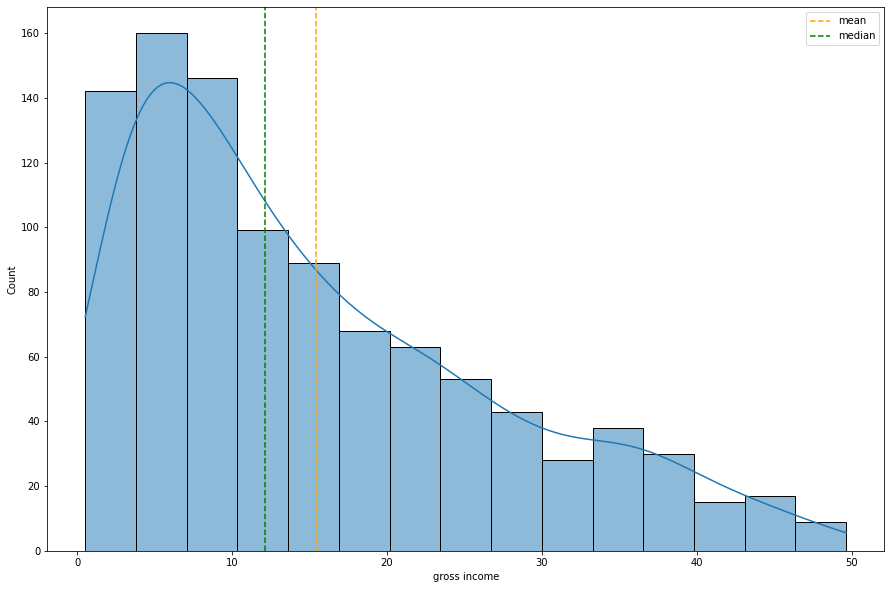

In [ ]:
# Distributin Plot

plt.figure(figsize=(15, 10))

sns.histplot(df_cleaned['gross income'], kde=True)
plt.axvline(df_cleaned['gross income'].mean(), linestyle='dashed', label='mean', color='orange')
plt.axvline(df_cleaned['gross income'].median(), linestyle='dashed', label='median', color='green')

plt.legend()
plt.show()

In [ ]:
# Box Plot
plt.figure(figsize=(15, 10))

fig = px.box(df_cleaned['gross income'])

fig.show()

<Figure size 1080x720 with 0 Axes>

Based on result above, our dataset is `not normally distributed`, due to `Mean` value higher than `Median and Mode` value, Our dataset is `Right Skewed.`

Let's discard the outliers found. I will discard any value falls outside the Box plot.

In [ ]:
# IQR
IQR = df_cleaned['gross income'].quantile(0.75)-df_cleaned['gross income'].quantile(0.25)

# Threshold
upper = df_cleaned['gross income'].mean() + 1.5*IQR
bottom = df_cleaned['gross income'].mean() - 1.5*IQR

# Show Threshold value
print(f'Upper limit : ', upper)
print(f'Bottom limit : ', bottom)

Upper limit :  40.1599315
Bottom limit :  -9.401193500000003


Since `gross income` is non-negative value, so our bottom limit will be 0.

In [ ]:
# Filtering process

df_filtered = df_cleaned.loc[
    (df_cleaned['gross income']<=upper)
]

print(f'Total entries before :', len(df_cleaned))
print(f'Total entries after :', len(df_filtered))

Total entries before : 1000
Total entries after : 961


After the filtering process, 39 entries is discarded from the dataset.\
Let's check the distribution once again.

In [ ]:
# Descriptive Statistic

print('Measure of Central Tendency')
print()
print(f'Min : ', df_filtered['gross income'].min())
print(f'Mean : ', df_filtered['gross income'].mean().round(2))
print(f'Median : ', df_filtered['gross income'].median())
print(f'Mode : ', df_filtered['gross income'].mode())
print(f'Max : ', df_filtered['gross income'].max())

print()

print('Measure of Variance')
print()
print(f'Range : ', df_filtered['gross income'].max() - df_filtered['gross income'].min())
print(f'1st Quartile : ', df_filtered['gross income'].quantile(0.25))
print(f'3rd Quartile : ', df_filtered['gross income'].quantile(0.75))
print(f'Variance : ', df_filtered['gross income'].var().round(2))
print(f'Std. Deviation : ', df_filtered['gross income'].std().round(2))

Measure of Central Tendency

Min :  0.5085
Mean :  14.2
Median :  11.409
Mode :  0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
Name: gross income, dtype: float64
Max :  40.1445

Measure of Variance

Range :  39.636
1st Quartile :  5.662
3rd Quartile :  21.033
Variance :  106.62
Std. Deviation :  10.33


In [ ]:
# Graph
plt.figure(figsize=(15, 10))

fig = px.box(df_filtered['gross income'])

fig.show()

<Figure size 1080x720 with 0 Axes>

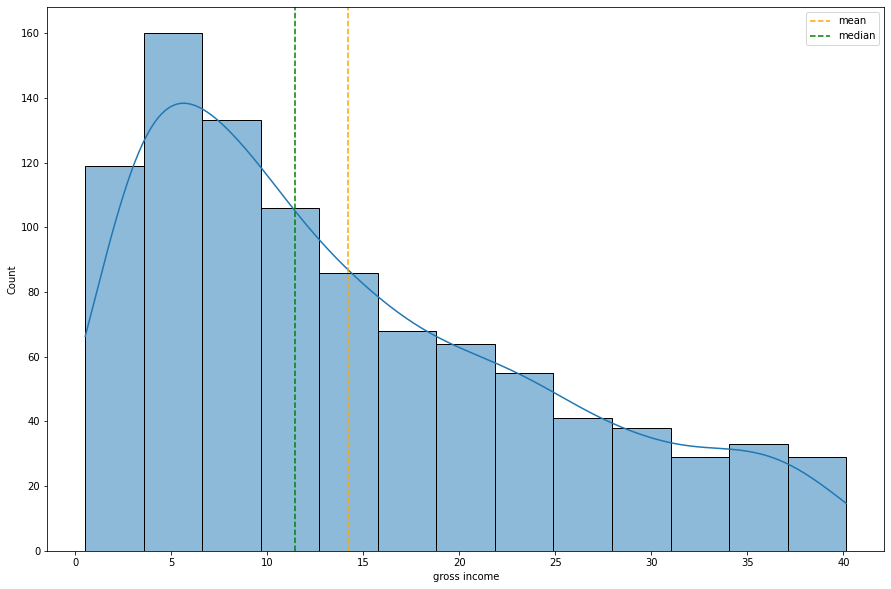

In [ ]:
# Dist
# Graph
plt.figure(figsize=(15, 10))

sns.histplot(df_filtered['gross income'], kde=True)
plt.axvline(df_filtered['gross income'].mean(), linestyle='dashed', label='mean', color='orange')
plt.axvline(df_filtered['gross income'].median(), linestyle='dashed', label='median', color='green')

plt.legend()
plt.show()

Although outliers has been discarded, our datased distribution is still `not normally distributed`. So, for hypothesis testing, since our `sample size is higher than 30` sample, I'll just `asume` that the `dataset is normally distributed.`

In [ ]:
# Dataset Preparation

# Member - Female
MF = df_filtered.loc[
    (df_filtered['Customer type']=='Member') &
    (df_filtered['Gender']=='Female')
][['Date','gross income']].groupby('Date').sum()

# Member - Male
MM = df_filtered.loc[
    (df_filtered['Customer type']=='Member') &
    (df_filtered['Gender']=='Male')
][['Date','gross income']].groupby('Date').sum()

# Normal - Female
NF = df_filtered.loc[
    (df_filtered['Customer type']=='Member') &
    (df_filtered['Gender']=='Female')
][['Date','gross income']].groupby('Date').sum()

# Normal - Male
NM = df_filtered.loc[
    (df_filtered['Customer type']=='Member') &
    (df_filtered['Gender']=='Female')
][['Date', 'gross income']].groupby('Date').sum()

In [ ]:
# gross income mean for each `Customer type - Gender`
mu1 = MF.mean().round(2).item()
mu2 = MM.mean().round(2).item()
mu3 = NF.mean().round(2).item()
mu4 = NM.mean().round(2).item()

print(f'Mean gross income `Member-Female : `', mu1)
print(f'Mean gross income `Member-Male : `', mu2)
print(f'Mean gross income `Normal-Female : `', mu3)
print(f'Mean gross income `Normal-Male : `', mu4)

Mean gross income `Member-Female : ` 43.56
Mean gross income `Member-Male : ` 37.62
Mean gross income `Normal-Female : ` 43.56
Mean gross income `Normal-Male : ` 43.56


### Hypothesis Notation

> - Null Hypothesis : Mean `gross income` value is statistically the same across `Customer type - Gender` variable
> - Alt. Hypothesis : Mean `gross income` value is significantly different across `Customer type - Gender` variable

### Mathematical Notation

> - **H0 : μ_MM = μ_MF = μ_NF = μ_NM**
> - **H1 : μ_MM != μ_MF != μ_NF != μ_N**

### Level of Significance

for this test, I determine the `level of significance` will be `5%`.

> **ɑ = 0.05**

### ANOVA

Since I want to compare mean value of four different category with one variable, I will using `ANOVA` for this test.

In [ ]:
# One-way ANOVA Testing
f_stat, p_value = stats.f_oneway(MF, MM, NF, NM)

p_value = p_value.round(3).item()
f_stat = f_stat.round(3).item()

print(f'P-value: ',p_value)
print(f'f_stat: ', f_stat)

P-value:  0.499
f_stat:  0.793


In [ ]:
# Compare P_value with Level of Significance

p_value <= 0.05

False

### Result Interpretation

From P_value comparisson with Level of Significance, We can see that `P_value is greater than ɑ.`\

So, I can conclude that `there is not enough evidence to reject the null hypothesis.`\
Mean `gross income` value is statistically the same across `Customer type - Gender` variable

## VI. Conclusion and Actionable Output 

### Key Insight

Here are some key insight I found during my data exploring and analyzing process.

**Total Gross Income**
- Across last three months, total `gross income` seems on sideways trend.\
- Highest `gross income` was generated on `9-March-2019` with total `gross income` equal to `$355.907.`\
- Lowest `gross income` was generated on `13-February-2019` with total `gross income` only `$44.49.`

**Most Profitable Branch**
- the most profitable one is branch `C` which located at `Naypyitaw` city.
- Regardless, the other two branch actually did good too.

**Product Lines Popularity**
- `Most popular` Product line is `Electronic Accessories` while the `unpopular one is Health and beauty.`
- Although placed on number 1, `Fashion accessories` placed at 3th in terms of generates `gross income.` 
- `Food and beverages` generates most gross income while `Health and beauty` generates the least.

**Most Profitable Customer Type and Gender**
- Most valuable customer is `Female-Member`, because they generate a total of `$ 4197.47` gross income.

**Customer Spending**
- Our `Member-Female` customer, spend the most at `Food and beverages` and spend the least at `Health and beauty`
- Our `Member-Male` customer, spend the most at `Health and beauty` and spend the least at `Home and lifestyle`
- Our `Normal-Female` customer, spend the most at `Electronic accessories` and spend the least at `Health and beauty`
- Our `Normal-Male` customer, spend the most at `Sports and travel` and spend the least at `Food and beverages`

**Customer Relationship**
- There is no `Unhappy` customer in terms of the company service.

**Customer Behaviour**
- All payment method are used equally by the customer.
- Highest volume transaction is equally spreadout thorughout timespan.
- Highest quantity transaction also equally spreadout thorughout timespan.

### Hypothesis Testing

Since the dataset is not `normally distributed` regardless the filtering process. I decide to `assume the dataset is normally distributed`,\
due the amount of samples taken is > 30 samples.

This is the result:
- Hypothesis Testing Goal : to check does the mean `gross income` value is statistically the same across `Customer type - Gender` variable.
- Level of Significance used : 0.05
- ANOVA test result : P_value = 0.499, F_statistic = 0.793
- P_value is greater than ɑ, So, there is not enough evidence to reject the null hypothesis.

Interpretation result:
>Mean `gross income` value is statistically the same across `Customer type - Gender` variable